In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read data
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=100000)
fares = pd.read_csv(trip_fare_file, nrows=100000)

# Merge the Trip and Fare data together 

In [4]:
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()

In [5]:
full_tripdata.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,1.033710,2.162330,682.381720,3.092583,-72.853142,40.148271,-72.800308,40.082386,12.331998,0.428265,0.49829,1.324516,0.171536,14.754605
std,0.310249,1.742334,461.783145,3.197229,9.050491,5.193093,10.572996,11.174743,9.714647,0.236299,0.02919,2.242804,1.020873,11.431332
min,1.000000,1.000000,0.000000,0.000000,-75.316666,0.000000,-736.533330,-3113.277600,2.500000,0.000000,0.00000,0.000000,0.000000,3.000000
25%,1.000000,1.000000,360.000000,1.150000,-73.993187,40.727672,-73.991905,40.726948,6.500000,0.500000,0.50000,0.000000,0.000000,8.000000
50%,1.000000,1.000000,600.000000,2.050000,-73.984245,40.745390,-73.980835,40.748234,9.500000,0.500000,0.50000,1.000000,0.000000,11.300000
75%,1.000000,3.000000,900.000000,3.790000,-73.969763,40.763062,-73.959595,40.766598,14.500000,0.500000,0.50000,2.000000,0.000000,17.262500
max,5.000000,6.000000,7500.000000,54.380000,0.000000,404.816010,1428.738300,49.183331,350.000000,1.000000,0.50000,200.000000,19.800000,350.500000


# What is the distribution of number of passengers per trip?

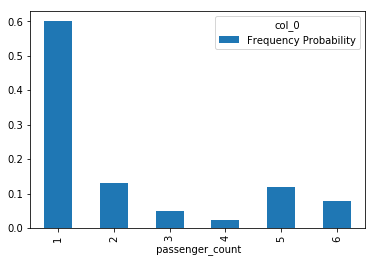

In [6]:
passengers = pd.crosstab(index=full_tripdata[" passenger_count"].astype("category"),columns="Frequency Probability",normalize='columns')
passengers.plot.bar()

# b. What is the distribution of payment_type?

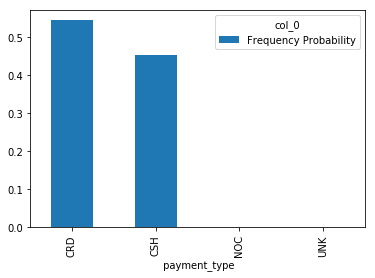

In [7]:
payment_types = pd.crosstab(index=full_tripdata[" payment_type"].astype("category"),columns="Frequency Probability",normalize='columns')
payment_types.plot.bar() 

# c. What is the distribution of fare amount?

In [8]:
full_tripdata[[" fare_amount"]].describe()

,fare_amount
count,100000.000000
mean,12.331998
std,9.714647
min,2.500000
25%,6.500000
50%,9.500000
75%,14.500000
max,350.000000


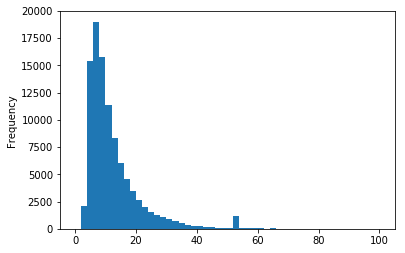

In [9]:
fare_amount = full_tripdata.iloc[:,15]
fare_amount.plot.hist(bins=50,range=(0,100))

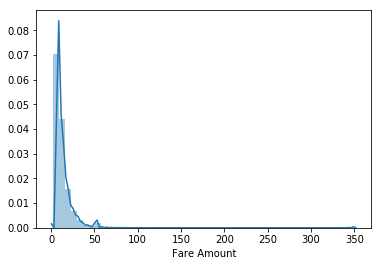

In [10]:
sns.distplot(full_tripdata[[" fare_amount"]],axlabel="Fare Amount")

# d. What is the distribution of tip amount?

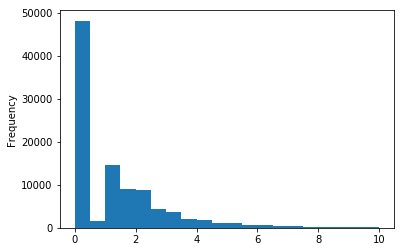

In [11]:
tips_amount = full_tripdata.iloc[:,18]
tips_amount.plot.hist(bins=20,range=(0,10))


In [12]:
full_tripdata[[" tip_amount"]].describe()

,tip_amount
count,100000.000000
mean,1.324516
std,2.242804
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,200.000000


In [13]:
#Caculate the percentage of trips without tip
notip = tips_amount.loc[(tips_amount == 0)].count()
notip
(float(len(tips_amount)-notip)) / len(tips_amount) * 100

52.024

count    52024.00000
mean         2.54597
std          2.56109
min          0.01000
25%          1.20000
50%          2.00000
75%          3.00000
max        200.00000
Name:  tip_amount, dtype: float64


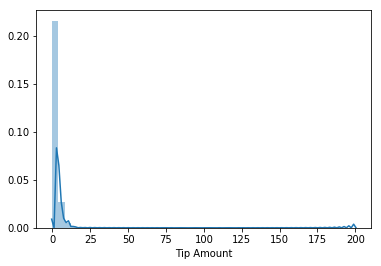

In [15]:
# plot the distribution after the zero tip trips removed 
withtip = tips_amount.loc[(tips_amount != 0)]
print withtip.describe()
sns.distplot(withtip.loc[(tips_amount != 0)],axlabel="Tip Amount")

count    52024.000000
mean        20.667133
std         23.012189
min          0.015625
25%         17.391304
50%         20.740741
75%         22.000000
max       3120.000000
dtype: float64

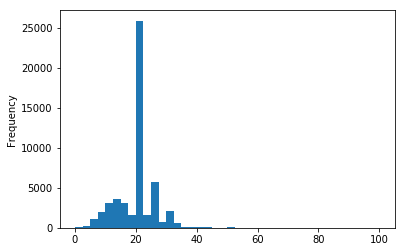

In [16]:
#caculate the percentage as tip as of trip fare
generosity = tips_amount /fare_amount * 100
generosity = generosity.loc[(generosity != 0)]
generosity.plot.hist(bins=40,range=(0,100))
generosity.describe()

# e. What is the distribution of total amount?

count    100000.000000
mean         14.754605
std          11.431332
min           3.000000
25%           8.000000
50%          11.300000
75%          17.262500
max         350.500000
Name:  total_amount, dtype: float64

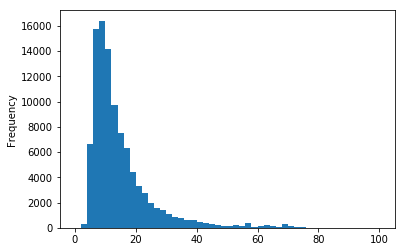

In [18]:
total_amounts = full_tripdata.iloc[:,20]
total_amounts.plot.hist(bins=50,range=(0,100))
total_amounts.describe()

# What are top 5 busiest hours of the day?

In [19]:
# set pickup time as index in dataframe, 
pickupTime = pd.DataFrame(full_tripdata.iloc[:,5])
pickupTime[" pickup_datetime"] = pd.to_datetime(pickupTime[" pickup_datetime"])
pickupTime.index = pickupTime[" pickup_datetime"]

#group by hour to list top 5 hours by count
frequency = pickupTime.groupby(pickupTime.index.hour).count()

frequency.sort_values(by=[" pickup_datetime"],ascending=False).head(5).index



Int64Index([23, 0, 1, 22, 2], dtype='int64', name=u' pickup_datetime')

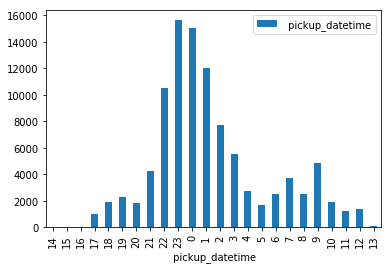

In [20]:
# reorder the index to form the near normal distribution bar chat
index = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
frequency["new index"] = index
frequency =  frequency.sort_values(["new index"])
frequency = frequency.drop(["new index"],axis=1)
frequency.plot.bar()